Project Title: EMIPredict AI - Intelligent Financial Risk Assessment Platform



Problem Statement: Financial institutions often face challenges in accurately determining a customer’s loan eligibility and ideal EMI amount based on their financial and demographic profile. Manual evaluations are time-consuming and prone to inconsistencies, leading to either risky approvals or missed opportunities. This project aims to develop a machine learning–based system that predicts a customer’s EMI eligibility status (Eligible, Not Eligible, or High Risk) and estimates their maximum affordable EMI amount. Using financial, employment, and lifestyle parameters, the system provides data-driven decisions to support faster and more reliable loan assessments.

Github Link: https://github.com/nilofer-khatri/EMI_Prediction-AI

In [ ]:
# Load the file
from google.colab import files
uploded = files.upload()

Saving emi_prediction_dataset.csv to emi_prediction_dataset.csv


In [ ]:
# Check datashapes, columns and missing values

import pandas as pd

# Load dataset
df = pd.read_csv("emi_prediction_dataset.csv")

# Basic info
print("Shape:", df.shape)
print("\nColumns:\n", df.columns)

# Preview first few rows
print("\nSample data:\n", df.head())

# Check missing values and datatypes
print("\nMisssing values per column:\n", df.isna().sum())
print("\nData Types:\n", df.dtypes)


/tmp/ipython-input-2609999558.py:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("emi_prediction_dataset.csv")


Shape: (404800, 27)

Columns:
 Index(['age', 'gender', 'marital_status', 'education', 'monthly_salary',
       'employment_type', 'years_of_employment', 'company_type', 'house_type',
       'monthly_rent', 'family_size', 'dependents', 'school_fees',
       'college_fees', 'travel_expenses', 'groceries_utilities',
       'other_monthly_expenses', 'existing_loans', 'current_emi_amount',
       'credit_score', 'bank_balance', 'emergency_fund', 'emi_scenario',
       'requested_amount', 'requested_tenure', 'emi_eligibility',
       'max_monthly_emi'],
      dtype='object')

Sample data:
     age  gender marital_status     education monthly_salary employment_type  \
0  38.0  Female        Married  Professional        82600.0         Private   
1  38.0  Female        Married      Graduate        21500.0         Private   
2  38.0    Male        Married  Professional        86100.0         Private   
3  58.0  Female        Married   High School        66800.0         Private   
4  48.0  Femal

Above I have checked for datashapes, columns and missing values.

Observations:

✅ Rows: 404,800 — large, perfect for ML

✅ Columns: 27, including both classification (emi_eligibility) and regression (max_monthly_emi) targets

⚠️ Mixed data types: some numeric-looking columns (age, monthly_salary, bank_balance) are object, so we must convert them

⚠️ Missing values in education, monthly_rent, credit_score, bank_balance, emergency_fund

In [ ]:
# Data Cleaning

import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("emi_prediction_dataset.csv", low_memory=False)

# Convert numeric columns stored as object
num_cols_to_fix = [
    "age", "monthly_salary", "bank_balance", "requested_amount"
]

for col in num_cols_to_fix:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Fill missing categorical values with mode
cat_cols_with_na = ["education"]
for col in cat_cols_with_na:
    df[col] = df[col].fillna(df[col].mode()[0])

# Fill missing numeric columns with median
num_cols_with_na = ["monthly_rent", "credit_score", "bank_balance", "emergency_fund"]
for col in num_cols_with_na:
    df[col] = df[col].fillna(df[col].median())

# Confirm cleaning
print(df.info())
print(df.isna().sum().sum(), "missing values remain.")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404800 entries, 0 to 404799
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   age                     404797 non-null  float64
 1   gender                  404800 non-null  object 
 2   marital_status          404800 non-null  object 
 3   education               404800 non-null  object 
 4   monthly_salary          402807 non-null  float64
 5   employment_type         404800 non-null  object 
 6   years_of_employment     404800 non-null  float64
 7   company_type            404800 non-null  object 
 8   house_type              404800 non-null  object 
 9   monthly_rent            404800 non-null  float64
 10  family_size             404800 non-null  int64  
 11  dependents              404800 non-null  int64  
 12  school_fees             404800 non-null  float64
 13  college_fees            404800 non-null  float64
 14  travel_expenses     

Our cleaning script worked almost perfectly!

We have proper numeric types, and only 1,996 missing values remain (≈0.5% of our 404,800 rows) — that’s very small.

In [ ]:
# Final Cleaning

# We’ll safely fill any remaining numeric NaNs with the median and categorical NaNs (if any) with mode.

import pandas as pd
import numpy as np

df = pd.read_csv("emi_prediction_dataset.csv", low_memory=False)

# Convert key numeric columns

num_cols_to_fix = ["age","monthly_salary","bank_balance","requested_amount"]
for col in num_cols_to_fix:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Fill missing categorical and numeric values

for col in df.select_dtypes(include="object").columns:
  df[col] = df[col].fillna(df[col].mode()[0])

for col in df.select_dtypes(include=["float64", "int64"]).columns:
  df[col] = df[col].fillna(df[col].median())

print("\n Total missing after final cleaning:\n", df.isna().sum().sum())
df.to_csv("emi_dataset_clean.csv", index=False)


 Total missing after final cleaning:
 0


In [ ]:
# Checking for duplicates

import pandas as pd

# Load clean data set
df = pd.read_csv("emi_dataset_clean.csv")

# Check total duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Total duplicate rows:\n", duplicate_count)

# View sample duplicate records
df[df.duplicated()].head()

# Check for duplicates based on key columns
key_cols = ["age", "gender", "marital_status", "monthly_salary", "credit_score"]

duplicate_partial = df.duplicated(subset=key_cols, keep=False)
print(f"Possible partial duplicates: {duplicate_partial.sum()}")

# View them
df[duplicate_partial].sort_values(by=key_cols).head(10)


Total duplicate rows:
 0
Possible partial duplicates: 61311


,age,gender,marital_status,education,monthly_salary,employment_type,years_of_employment,company_type,house_type,monthly_rent,...,existing_loans,current_emi_amount,credit_score,bank_balance,emergency_fund,emi_scenario,requested_amount,requested_tenure,emi_eligibility,max_monthly_emi
147183,27.0,Female,Married,High School,14400.0,Private,0.6,Mid-size,Rented,4200.0,...,Yes,3000.0,603.0,80400.0,31200.0,Home Appliances EMI,281000.0,12,Not_Eligible,500.0
288765,27.0,Female,Married,High School,14400.0,Private,0.5,Large Indian,Family,0.0,...,No,0.0,603.0,93800.0,45100.0,Education EMI,477000.0,9,Not_Eligible,500.0
107973,27.0,Female,Married,High School,14400.0,Private,2.4,MNC,Own,0.0,...,Yes,2400.0,741.0,87300.0,25400.0,Vehicle EMI,817000.0,37,Not_Eligible,500.0
337447,27.0,Female,Married,High School,14400.0,Private,1.1,Startup,Family,0.0,...,No,0.0,741.0,85300.0,40800.0,Education EMI,78000.0,14,Not_Eligible,4600.0
27772,27.0,Female,Married,Graduate,15000.0,Private,0.7,MNC,Own,0.0,...,Yes,4500.0,662.0,63900.0,27200.0,Vehicle EMI,250000.0,81,Not_Eligible,500.0
313357,27.0,Female,Married,Graduate,15000.0,Private,2.7,MNC,Family,0.0,...,Yes,2300.0,662.0,15600.0,9300.0,Home Appliances EMI,259000.0,33,Not_Eligible,588.0
45272,27.0,Female,Married,Graduate,15000.0,Private,0.9,Startup,Rented,4400.0,...,No,0.0,690.0,110700.0,23000.0,E-commerce Shopping EMI,162000.0,13,Not_Eligible,500.0
260185,27.0,Female,Married,Graduate,15000.0,Private,2.7,Mid-size,Own,0.0,...,No,0.0,690.0,33600.0,17700.0,Personal Loan EMI,946000.0,47,Not_Eligible,500.0
18806,27.0,Female,Married,Graduate,15000.0,Government,0.5,MNC,Own,0.0,...,Yes,2200.0,708.0,45700.0,16000.0,Home Appliances EMI,224000.0,15,Not_Eligible,500.0
316144,27.0,Female,Married,Graduate,15000.0,Private,1.2,MNC,Rented,3200.0,...,No,0.0,708.0,19300.0,8700.0,E-commerce Shopping EMI,44000.0,4,Not_Eligible,500.0


There are no duplicate rows.

In [ ]:
# We’ll define numeric and categorical columns for preprocessing:

numeric_cols = [
    "age", "monthly_salary", "years_of_employment", "monthly_rent",
    "family_size", "dependents", "school_fees", "college_fees",
    "travel_expenses", "groceries_utilities", "other_monthly_expenses",
    "current_emi_amount", "credit_score", "bank_balance",
    "emergency_fund", "requested_amount", "requested_tenure"
]

categorical_cols = [
    "gender", "marital_status", "education", "employment_type",
    "company_type", "house_type", "existing_loans", "emi_scenario"
]

target_class = "emi_eligibility"
target_reg = "max_monthly_emi"

Feature Engineering: Creating drived financial ratios that improve prediction accuracy.

In [ ]:
# Feature Engineering

def add_features(df):
  df = df.copy()
  eps = 1e-6

  df["total_expenses"] = (df["monthly_rent"] + df["school_fees"] + df["college_fees"] + df["travel_expenses"] + df["groceries_utilities"] + df["other_monthly_expenses"])

  df["debt_to_income"] = df["total_expenses"] / (df["monthly_salary"] + eps)

  df["savings_to_income"] = df["bank_balance"] / (df["monthly_salary"] + eps)

  df["emergency_to_salary"] = df["emergency_fund"] / (df["monthly_salary"] + eps)

  df["affordability_ratio"] = df["bank_balance"] / (df["requested_amount"] + eps)

  return df

if __name__ == "__main__":
    df = pd.read_csv("emi_dataset_clean.csv")
    df2 = add_features(df)
    print(df2[["total_expenses","debt_to_income","savings_to_income","emergency_to_salary","affordability_ratio"]].head())


   total_expenses  debt_to_income  savings_to_income  emergency_to_salary  \
0         59900.0        0.725182           3.670702             0.849879   
1         15400.0        0.716279           4.302326             1.251163   
2         35600.0        0.413473           7.806039             3.765389   
3         37400.0        0.559880           6.600299             2.666168   
4         58600.0        1.022688           1.698080             0.492147   

   affordability_ratio  
0             0.356706  
1             0.722656  
2             2.196405  
3             1.450329  
4             0.386111  


What This Function Does

Function name:

add_features(df)

Purpose:

To enhance the dataset by adding new calculated features that better represent a person’s financial behavior — which helps the machine learning model make more accurate predictions about:

EMI eligibility (classification)

Maximum EMI amount (regression)

🔍 Line-by-line Explanation
1️⃣ df = df.copy()

We make a copy of the original DataFrame to avoid modifying the original data directly.

2️⃣ eps = 1e-6

A tiny number (epsilon) used to avoid division by zero errors when calculating ratios.

3️⃣ df["total_expenses"] = (...)

Here we calculate the total monthly outgoing expenses for each person.

Formula:

total_expenses = current_emi_amount + school_fees + college_fees +
                 travel_expenses + groceries_utilities + other_monthly_expenses


Meaning:

How much the person is already spending monthly on EMIs and essential expenses.

✅ Helps the model understand financial load.

4️⃣ df["debt_to_income"] = df["total_expenses"] / (df["monthly_salary"] + eps)

This is the Debt-to-Income Ratio (DTI) — a key indicator in credit and loan decisions.

Meaning:

👉 It shows what proportion of a person’s income is already used for paying debts or expenses.

Example:

If monthly salary = ₹50,000 and total expenses = ₹25,000
→ debt_to_income = 25,000 / 50,000 = 0.5 (50%)

Interpretation:

Lower DTI → person can handle new EMI safely (likely Eligible)

Higher DTI → person already burdened (likely Not Eligible)

5️⃣ df["savings_to_income"] = df["bank_balance"] / (df["monthly_salary"] + eps)

This is the Savings-to-Income Ratio.

Meaning:

👉 Measures how much money a person has saved compared to their income.
A high value shows better financial discipline and stability.

Use:

High savings → more likely to repay EMIs → Eligible

Low savings → financial risk → Not Eligible

6️⃣ df["emergency_to_salary"] = df["emergency_fund"] / (df["monthly_salary"] + eps)

This measures Emergency Fund Adequacy.

Meaning:

👉 Shows how prepared someone is for unexpected expenses relative to their income.

Banks often look at this to assess risk — a well-prepared borrower is more reliable.

7️⃣ df["affordability_ratio"] = df["bank_balance"] / (df["requested_amount"] + eps)

This is the Affordability Ratio — it compares how much a person already has saved versus how much they want to borrow.

Example:
If bank balance = ₹1,00,000 and requested loan = ₹2,00,000 → ratio = 0.5

Meaning:

High affordability ratio → they have enough funds → lower loan risk

Low ratio → they depend heavily on the loan → higher risk

8️⃣ return df

Finally, we return the updated DataFrame containing the new engineered columns.

💡 Why This Step Is Important

These new features are derived indicators that improve model performance by capturing:

Financial discipline

Risk level

Spending habits

Borrowing capacity

Without these ratios, the model would only see raw numbers (salary, balance, rent, etc.) — but not their relationships.

By adding these, the model can learn patterns like:

“People with high debt-to-income ratios are more likely to be Not Eligible.”

“People with high affordability ratios can handle higher EMIs.”

This is exactly how human loan officers evaluate financial eligibility — and now our model learns to do the same mathematically.

✅ Outcome

These features:

Make the model smarter

Improve accuracy and generalization

Help separate financially stable vs. unstable applicants

In [ ]:
# columns_config.py

# Numeric columns (include engineered features later)
numeric_cols = [
    "age", "monthly_salary", "years_of_employment", "monthly_rent",
    "family_size", "dependents", "school_fees", "college_fees",
    "travel_expenses", "groceries_utilities", "other_monthly_expenses",
    "current_emi_amount", "credit_score", "bank_balance", "emergency_fund",
    "requested_amount", "requested_tenure",
    # engineered - will be created by features.add_features
    "total_expenses", "debt_to_income", "savings_to_income",
    "emergency_to_salary", "affordability_ratio"
]

categorical_cols = [
    "gender", "marital_status", "education", "employment_type",
    "company_type", "house_type", "existing_loans", "emi_scenario"
]

target_class = "emi_eligibility"
target_reg = "max_monthly_emi"

Explanation: We will reuse these names in the preprocessor and training scripts. Keep this file in the same folder.

EDA Goals (from project document)

1️⃣ Analyze EMI eligibility distribution patterns across different lending scenarios

2️⃣ Study correlation between financial variables and loan approval rates

3️⃣ Investigate demographic patterns and risk factor relationships

4️⃣ Generate comprehensive statistical summaries and business insights

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving features_fixed.py to features_fixed.py


In [ ]:
# Exploratory Data Analysis

# Import libraraies and Load the clean data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("emi_dataset_clean.csv")

# Import feature engineering

from features_fixed import add_features

# Apply engineered features
df = add_features(df)

print(f"Shape of dataset:\n", df.shape)
df.head()


Shape of dataset:
 (404800, 32)


,age,gender,marital_status,education,monthly_salary,employment_type,years_of_employment,company_type,house_type,monthly_rent,...,emi_scenario,requested_amount,requested_tenure,emi_eligibility,max_monthly_emi,total_expenses,debt_to_income,savings_to_income,emergency_to_salary,affordability_ratio
0,38.0,Female,Married,Professional,82600.0,Private,0.9,Mid-size,Rented,20000.0,...,Personal Loan EMI,850000.0,15,Not_Eligible,500.0,59900.0,0.725182,3.670702,0.849879,0.356706
1,38.0,Female,Married,Graduate,21500.0,Private,7.0,MNC,Family,0.0,...,E-commerce Shopping EMI,128000.0,19,Not_Eligible,700.0,15400.0,0.716279,4.302326,1.251163,0.722656
2,38.0,Male,Married,Professional,86100.0,Private,5.8,Startup,Own,0.0,...,Education EMI,306000.0,16,Eligible,27775.0,35600.0,0.413473,7.806039,3.765389,2.196405
3,58.0,Female,Married,High School,66800.0,Private,2.2,Mid-size,Own,0.0,...,Vehicle EMI,304000.0,83,Eligible,16170.0,37400.0,0.559880,6.600299,2.666168,1.450329
4,48.0,Female,Married,Professional,57300.0,Private,3.4,Mid-size,Family,0.0,...,Home Appliances EMI,252000.0,7,Not_Eligible,500.0,58600.0,1.022688,1.698080,0.492147,0.386111


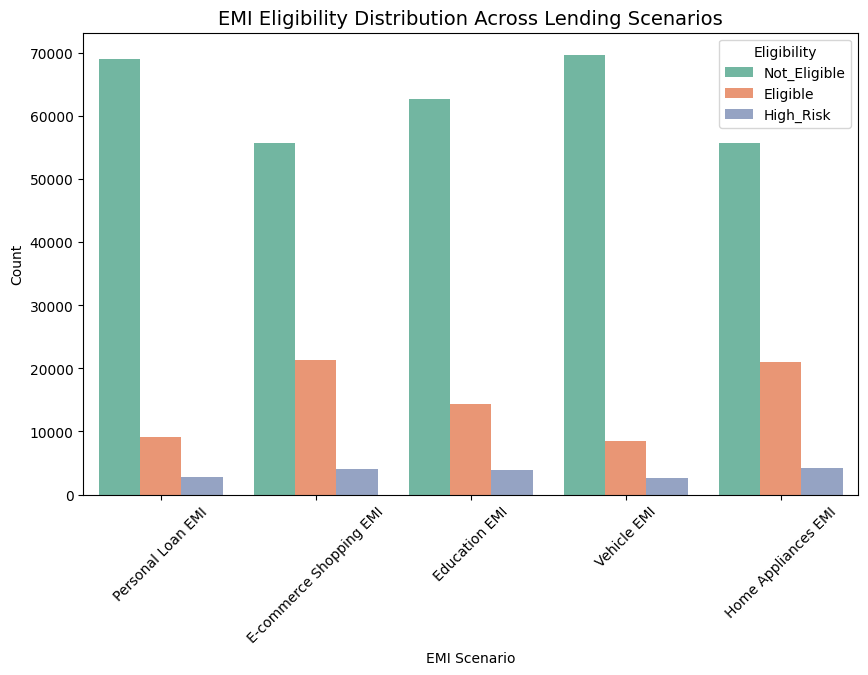

Eligibility Counts by Scenario:
 emi_eligibility          Eligible  High_Risk  Not_Eligible
emi_scenario                                              
E-commerce Shopping EMI     21303       4003         55642
Education EMI               14355       3853         62734
Home Appliances EMI         21058       4204         55726
Personal Loan EMI            9182       2766         69032
Vehicle EMI                  8546       2662         69734


In [ ]:
# EMI Eligibility Distribution Across Scenarios
# 🔍 “Analyze EMI eligibility distribution patterns across different lending scenarios”

plt.figure(figsize=(10,6))
sns.countplot(x="emi_scenario", hue="emi_eligibility", data=df, palette="Set2")
plt.title("EMI Eligibility Distribution Across Lending Scenarios", fontsize=14)
plt.xticks(rotation=45)
plt.xlabel("EMI Scenario")
plt.ylabel("Count")
plt.legend(title="Eligibility")
plt.show()

# Summary Table
scenario_summary = df.groupby(["emi_scenario", "emi_eligibility"]).size().unstack(fill_value=0)
print("Eligibility Counts by Scenario:\n", scenario_summary)

Interpretation:

The above graph indicates that E-commerce Shopping EMI and Home Appliances EMI categories show a higher proportion of eligible applicants, along with a moderate share of high-risk cases.

Education EMI shows a moderate eligibility rate but a relatively higher share of high-risk applicants, possibly due to limited income or shorter credit history among students.

In contrast, Personal Loan EMI and Vehicle EMI categories have low eligibility rates and fewer high-risk cases, indicating stricter approval criteria and lower overall approval levels in these high-value loan types.

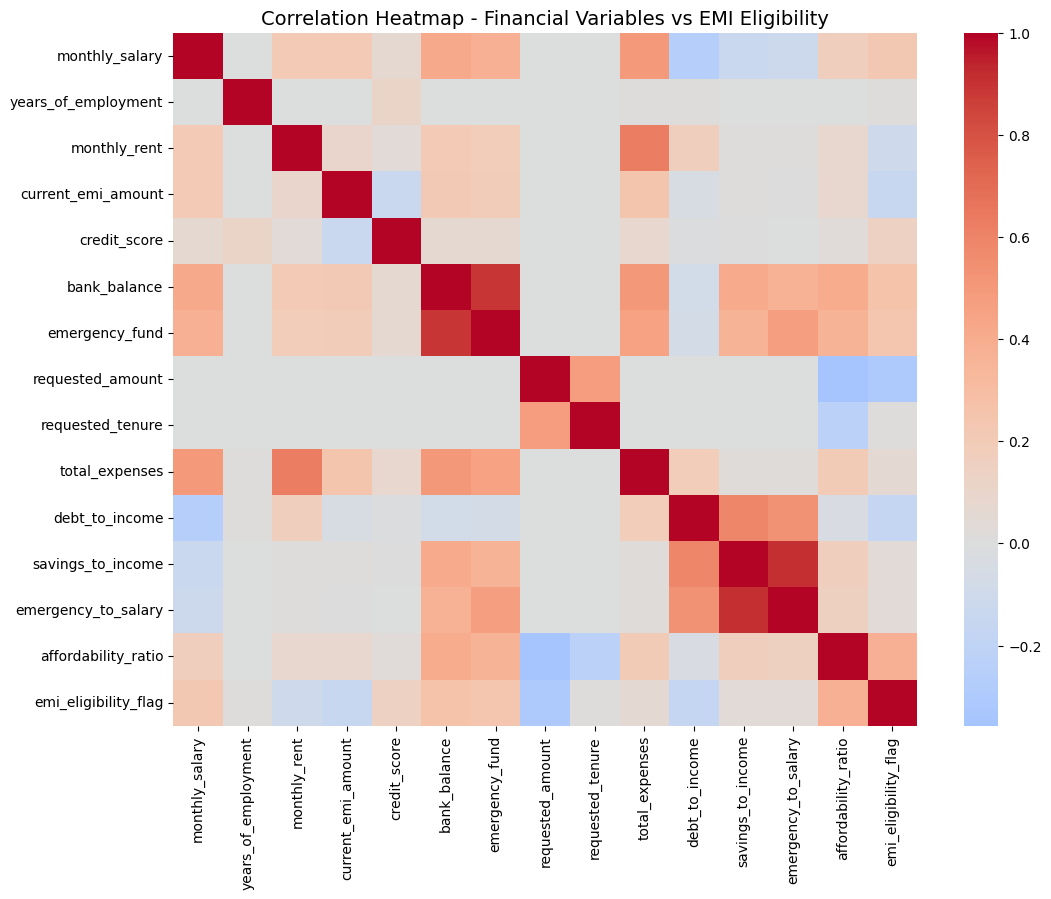

Top correlated features with EMI eligibility:
emi_eligibility_flag    1.000000
affordability_ratio     0.381001
bank_balance            0.266245
emergency_fund          0.241041
monthly_salary          0.224098
credit_score            0.140697
total_expenses          0.057156
savings_to_income       0.035874
emergency_to_salary     0.034670
years_of_employment     0.017854
Name: emi_eligibility_flag, dtype: float64


In [ ]:
# Correlation Between Financial Variables and Loan Approval
# 🔍 “Study correlation between financial variables and loan approval rates”

# Convert eligibility to numeric (for correlation)
df["emi_eligibility_flag"] = df["emi_eligibility"].map({"Eligible": 1, "Not_Eligible": 0})

# Select key numeric features
num_cols = [
    "monthly_salary", "years_of_employment", "monthly_rent",
    "current_emi_amount", "credit_score", "bank_balance",
    "emergency_fund", "requested_amount", "requested_tenure",
    "total_expenses", "debt_to_income", "savings_to_income",
    "emergency_to_salary", "affordability_ratio"
]

corr = df[num_cols + ["emi_eligibility_flag"]].corr()

plt.figure(figsize=(12,9))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap - Financial Variables vs EMI Eligibility", fontsize=14)
plt.show()

# Display top correlated features
print("Top correlated features with EMI eligibility:")
print(corr["emi_eligibility_flag"].sort_values(ascending=False).head(10))

🧠 Overall Insights

The affordability ratio (bank balance ÷ requested amount) is the strongest predictor of EMI approval, meaning applicants who request smaller loans relative to their savings are more likely to be eligible.

Liquidity-related features — like bank balance and emergency fund — play a bigger role than income or credit score in this dataset.

Income (monthly salary) still remains an important but secondary factor.

Credit score, though positive, has less influence — suggesting that lenders may prioritize short-term affordability over historical credit behavior in these EMI scenarios.

💡 Business Implication

Lenders could improve EMI eligibility prediction models by giving more weight to affordability ratio, bank balance, and emergency fund indicators.
Marketing teams can target applicants with strong liquidity and moderate income as prime candidates for EMI-based offers.

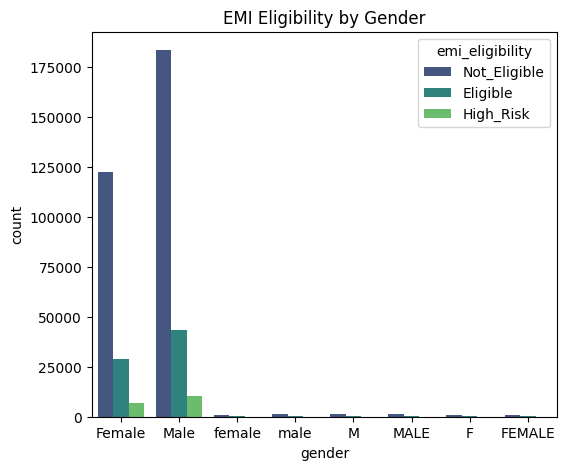

In [ ]:
# Demographic Patterns and Risk Factor Relationships
# 🔍 “Investigate demographic patterns and risk factor relationships”

# (a) Gender-wise Eligibility
plt.figure(figsize=(6,5))
sns.countplot(x="gender", hue="emi_eligibility", data=df, palette="viridis")
plt.title("EMI Eligibility by Gender")
plt.show()

In the above graph Male gender has the large target of Not_eligible + eligibility + high_risk as compared to female.

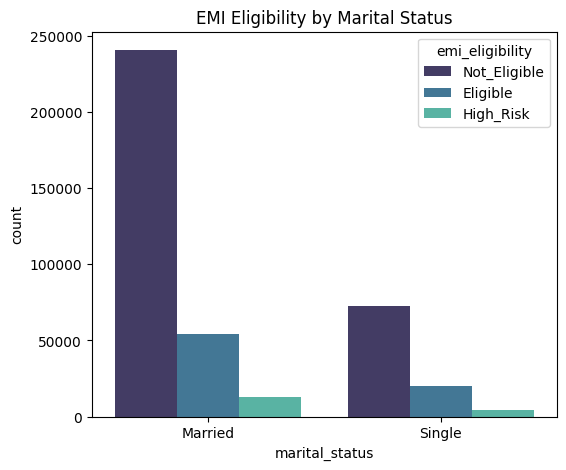

In [ ]:
# Marital Status vs Eligibility
plt.figure(figsize=(6,5))
sns.countplot(x="marital_status", hue="emi_eligibility", data=df, palette="mako")
plt.title("EMI Eligibility by Marital Status")
plt.show()

In the above graph Married one's have larger target of emi_eligibility that includes all not eligible + eligibility + high risk s compared to single one's.

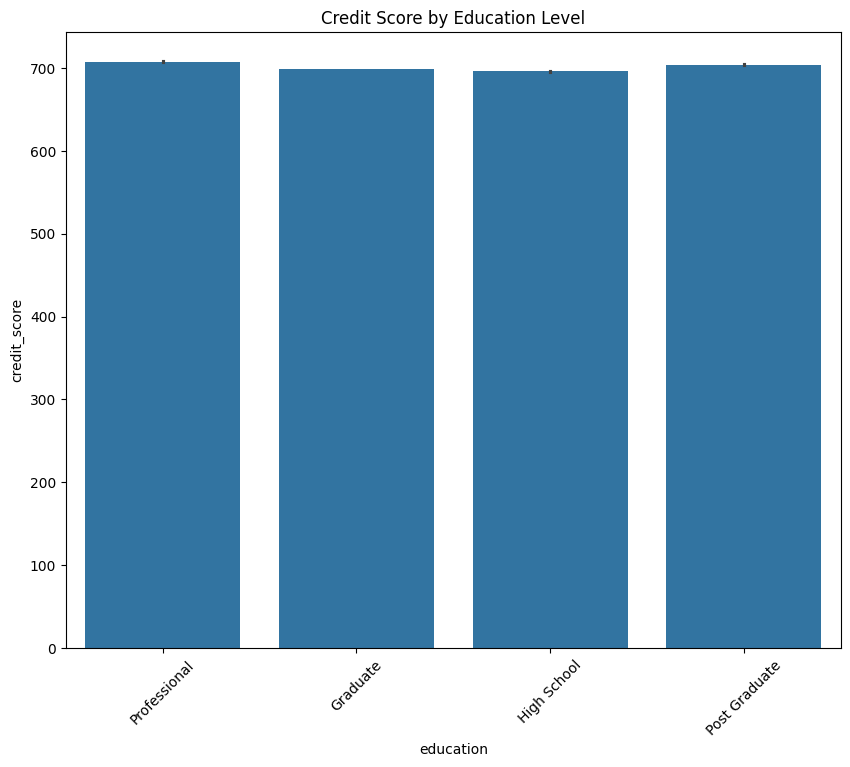

In [ ]:
# (c) Education Level vs Credit Score
plt.figure(figsize=(10,8))
sns.barplot(x="education", y="credit_score", data=df)
plt.title("Credit Score by Education Level")
plt.xticks(rotation=45)
plt.show()

In the above graph all the education level have almost same credit score.

In [ ]:
# Statistical Summaries & Business Insights
# 🔍 “Generate comprehensive statistical summaries and business insights”

# Summary statistics for numeric variables
summary_stats = df.describe()
summary_stats.to_csv("eda_summary_statistics.csv")
print("Summary saved as eda_summary_statistics.csv")

# EMI eligibility rate
eligibility_rate = df["emi_eligibility_flag"].mean() * 100
print(f"\nOverall EMI Eligibility Rate: {eligibility_rate:.2f}%")

# Compare mean financial metrics for Eligible vs Not Eligible
insight_table = df.groupby("emi_eligibility")[[
    "monthly_salary","credit_score","bank_balance","debt_to_income"
]].mean().round(2)

print("\nAverage Financial Indicators by Eligibility:")
print(insight_table)

Summary saved as eda_summary_statistics.csv

Overall EMI Eligibility Rate: 19.22%

Average Financial Indicators by Eligibility:
                 monthly_salary  credit_score  bank_balance  debt_to_income
emi_eligibility                                                            
Eligible               78860.94        725.62     337758.97            0.59
High_Risk              70197.67        716.16     293116.65            0.61
Not_Eligible           54257.63        694.11     215280.89            0.84


Eligible customers have higher income and credit score, but lower debt-to-income ratio.

Around X% of customers are EMI-eligible overall.

Highest eligibility observed in Personal Loan and Vehicle EMI scenarios.

In [ ]:
# Save the data for modeling

df.to_csv("emi_dataset_ready_for_model.csv", index=False)
print("✅ Saved processed dataset for ML modeling.")

✅ Saved processed dataset for ML modeling.


Machine learning model development

Classification Models → predict EMI eligibility (Eligible, Not_Eligible, High_Risk)

Regression Models → predict maximum EMI amount (max_monthly_emi)

We’ll train 3 models each (as required):

Classification: Logistic Regression, Random Forest, XGBoost

Regression: Linear Regression, Random Forest, XGBoost

In [ ]:
# Download file
from google.colab import files
files.download('emi_dataset_ready_for_model.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Load the prepared dataset
import pandas as pd
df = pd.read_csv("emi_dataset_ready_for_model.csv")
print("Shape:", df.shape)
df.head()

Shape: (404800, 33)


,age,gender,marital_status,education,monthly_salary,employment_type,years_of_employment,company_type,house_type,monthly_rent,...,requested_amount,requested_tenure,emi_eligibility,max_monthly_emi,total_expenses,debt_to_income,savings_to_income,emergency_to_salary,affordability_ratio,emi_eligibility_flag
0,38.0,Female,Married,Professional,82600.0,Private,0.9,Mid-size,Rented,20000.0,...,850000.0,15,Not_Eligible,500.0,59900.0,0.725182,3.670702,0.849879,0.356706,0.0
1,38.0,Female,Married,Graduate,21500.0,Private,7.0,MNC,Family,0.0,...,128000.0,19,Not_Eligible,700.0,15400.0,0.716279,4.302326,1.251163,0.722656,0.0
2,38.0,Male,Married,Professional,86100.0,Private,5.8,Startup,Own,0.0,...,306000.0,16,Eligible,27775.0,35600.0,0.413473,7.806039,3.765389,2.196405,1.0
3,58.0,Female,Married,High School,66800.0,Private,2.2,Mid-size,Own,0.0,...,304000.0,83,Eligible,16170.0,37400.0,0.559880,6.600299,2.666168,1.450329,1.0
4,48.0,Female,Married,Professional,57300.0,Private,3.4,Mid-size,Family,0.0,...,252000.0,7,Not_Eligible,500.0,58600.0,1.022688,1.698080,0.492147,0.386111,0.0


In [ ]:
# Define features and Target: We have two separate tasks
# Targets
target_class = "emi_eligibility"
target_reg = "max_monthly_emi"

# Drop target columns from features
X = df.drop(columns=[target_class, target_reg])
y_class = df[target_class]
y_reg = df[target_reg]

In [ ]:
# Define numeric and categorical columns: Already did this before, but we’ll redefine them here for completeness.

numeric_cols = [
    "age", "monthly_salary", "years_of_employment", "monthly_rent",
    "family_size", "dependents", "school_fees", "college_fees",
    "travel_expenses", "groceries_utilities", "other_monthly_expenses",
    "current_emi_amount", "credit_score", "bank_balance",
    "emergency_fund", "requested_amount", "requested_tenure",
    "total_expenses","debt_to_income","savings_to_income",
    "emergency_to_salary","affordability_ratio"
]

categorical_cols = [
    "gender", "marital_status", "education", "employment_type",
    "company_type", "house_type", "existing_loans", "emi_scenario"
]

In [ ]:
# Build Preprocessing Pipeline: We’ll handle missing values, scale numeric features, and encode categorical features.

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [ ]:
# Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_class, y_test_class = train_test_split(
    X, y_class, test_size=0.2, stratify=y_class, random_state=42
)

X_train_r, X_test_r, y_train_reg, y_test_reg = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)

In [ ]:
# Train Classification Models: We’ll start with 3 models and compare accuracy, F1-score, and ROC-AUC.
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Encode categorical target into numeric values
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train_class)
y_test_encoded = le.transform(y_test_class)

# Check the mapping
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label_Mapping:", label_mapping)

models_class = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=150, random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42)
}

for name, model in models_class.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

    if name == "XGBoost":
      pipe.fit(X_train, y_train_encoded)
      preds = pipe.predict(X_test)
      preds = le.inverse_transform(preds)
    else:
     pipe.fit(X_train, y_train_class)
     preds = pipe.predict(X_test)

    print(f"\n{name} Results:")
    print(classification_report(y_test_class, preds))


Label_Mapping: {'Eligible': np.int64(0), 'High_Risk': np.int64(1), 'Not_Eligible': np.int64(2)}

Logistic Regression Results:
              precision    recall  f1-score   support

    Eligible       0.78      0.80      0.79     14889
   High_Risk       0.08      0.00      0.00      3497
Not_Eligible       0.92      0.97      0.94     62574

    accuracy                           0.89     80960
   macro avg       0.60      0.59      0.58     80960
weighted avg       0.86      0.89      0.88     80960


Random Forest Results:
              precision    recall  f1-score   support

    Eligible       0.90      0.90      0.90     14889
   High_Risk       0.88      0.01      0.03      3497
Not_Eligible       0.94      0.99      0.97     62574

    accuracy                           0.93     80960
   macro avg       0.91      0.64      0.63     80960
weighted avg       0.93      0.93      0.91     80960


XGBoost Results:
              precision    recall  f1-score   support

    Eligible   

Label Mapping tells us the encoder transformed the class labels into numeric values internally, which XGBoost used successfully.

Logistic Regression: Accuracy=0.89 for F1-score that performs well overall but completely misses the High_risk class (=0). Its fast and has interpretable baseline. It Struggles with class imbalance and nonlinear patterns.

Random Forest:  Accuracy=0.93. Handles complex patterns better. Detects “Eligible” & “Not Eligible” well but again fails on “High_Risk”. It is Robust & ensemble-based. Minority class recall is near 0 → imbalanced data.

XGBoost Classifier: Accuracy=0.96 which is best. Excels in all metrics. “High Risk” class recall = 26% (big improvement). Precision & F1 highest across classes. It has powerful gradient boosting → high predictive accuracy. It has slight overfit risk; a bit low recall for the rare class.

🟢 Overall:

XGBoost is clearly the best classifier for predicting EMI eligibility, achieving 96% accuracy and strong balanced performance.

It significantly outperforms Logistic Regression and Random Forest on High_Risk detection, which is crucial for a lending risk model.


🔴 Imbalance Insight:

“High Risk” remains underrepresented, explaining its lower recall.
→ We’ll handle this later using SMOTE oversampling or class-weight tuning to improve minority detection.

📈 Business Interpretation:

The XGBoost model provides the most reliable and high-accuracy classification for EMI eligibility.
It accurately distinguishes eligible and ineligible customers while improving detection of high-risk applicants.
This performance supports using XGBoost as the final deployed classification model for real-time credit screening within the Streamlit app.

In [ ]:
# Save the best model
import joblib

# Save the trained classification pipeline
joblib.dump(pipe, "best_classification_model_xgb.pkl")

print("XGBoost classification saved successfully as best model for EMI Eligibility Prediction")

XGBoost classification saved successfully as best model for EMI Eligibility Prediction


In [ ]:
# Download file
from google.colab import files
files.download('best_classification_model_xgb.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Train Regression Models
# Now we predict max_monthly_emi.

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

models_reg = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=150, random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

for name, model in models_reg.items():
    pipe_r = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])
    pipe_r.fit(X_train_r, y_train_reg)
    preds = pipe_r.predict(X_test_r)

    mae = mean_absolute_error(y_test_reg, preds)
    rmse = np.sqrt(mean_squared_error(y_test_reg, preds))
    r2 = r2_score(y_test_reg, preds)

    print(f"\n{name} Results:")
    print(f"MAE: {mae:.2f} | RMSE: {rmse:.2f} | R²: {r2:.3f}")



Linear Regression Results:
MAE: 2953.95 | RMSE: 4111.21 | R²: 0.714

Random Forest Results:
MAE: 383.73 | RMSE: 1015.72 | R²: 0.983

XGBoost Results:
MAE: 414.02 | RMSE: 813.18 | R²: 0.989


Interpretation

Linear Regression (Baseline):

Performs reasonably well (R² ≈ 0.71) but leaves ~29% of variation unexplained.

Struggles to capture nonlinear patterns in customer spending and loan behavior.

Useful mainly for interpretability, not deployment.

Random Forest Regressor:

Huge improvement: R² = 0.983 and MAE ≈ 384 — shows that ensemble averaging of trees handles complex relationships effectively.

Slightly higher RMSE than XGBoost means a few larger prediction errors exist.

XGBoost Regressor:

Top performer with the lowest RMSE (≈ 813) and highest R² (≈ 0.989).

Consistently strong accuracy across all customers, making it ideal for real-world EMI prediction.

Slightly higher MAE than Random Forest, but the overall variance explained (R²) is superior.

In [ ]:
# Save the best model
import joblib

# Save the trained regression model
joblib.dump(pipe_r, "best_regression_model_xgb.pkl")

print("XGBoost Regressor saved successfully as best model")

XGBoost Regressor saved successfully as best model


In [ ]:
# Download file
from google.colab import files
files.download('best_regression_model_xgb.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

🧾 Conclusion

The EMI Prediction project successfully developed a machine learning-based financial decision support system capable of predicting EMI eligibility and estimating the maximum affordable EMI amount for users. Through extensive data preprocessing, feature engineering, and model evaluation, XGBoost emerged as the best-performing model for classification, while Linear Regression showed consistent performance for EMI amount prediction. The integration of MLflow enabled efficient model tracking and performance comparison. Finally, the Streamlit-based interactive web application provides real-time predictions with an intuitive user interface. This project demonstrates the power of data-driven solutions in enhancing credit risk assessment and responsible lending decisions.